## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import xgboost
import warnings

warnings.filterwarnings("ignore")

In [ ]:
pip install ucimlrepo

In [ ]:
pip install xgboost


## Loading data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets




In [4]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


**Attributes Description:**

1.age - age of individual in years

2.sex - gender of the individual

3.cp - chest pain (4 categories --- 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5.chol - serum cholestoral in mg/dl

6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg - resting electrocardiographic results (3 categories --- 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach - maximum heart rate achieved

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest (ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.)

11.slope - the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)

12.ca - number of major vessels (0-3) colored by flourosopy (refers to a medical observation or measurement related to coronary angiography, a procedure used to visualize the blood vessels (coronary arteries) supplying the heart muscle)

13.thal - findings from the Thallium-201 imaging (3 categories --- Thal 0 (normal): This suggests that there are no significant perfusion abnormalities in the heart. The Thallium-201 imaging shows normal blood flow to the myocardium, Thal 1 (fixed defect): This indicates an area of the heart where there is reduced blood flow, and this reduction is consistent and not influenced by stress (e.g., exercise). It may suggest scar tissue or permanent damage in that region, Thal 2 (reversible defect): This suggests an area of the heart with reduced blood flow that is influenced by stress. During stress (such as exercise or pharmacological stress testing), the blood flow to this region may become more compromised, but it can improve when the stress is relieved. This may indicate ischemia, which is a reversible reduction in blood flow to the heart muscle)

14.target - diagnosis of heart disease (angiographic disease status) (2 categories --- 0: < 50% diameter narrowing, 1: > 50% diameter narrowing)



In [5]:
X.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


In [6]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [7]:
y.tail()

,num
298,1
299,2
300,3
301,1
302,0


In [8]:
y=y.rename(columns={'num':"target"})

## Explotarory Analysis

In [9]:
df=pd.concat([X,y],axis=1)

In [10]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [11]:
df1=df.copy()

In [ ]:
df1.shape

(303, 14)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [13]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [37]:
df1 = df1.dropna(subset=['ca', 'thal'])


In [38]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
df1.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

In [40]:
#Change target to 0 and 1
df1['target']=df1['target'].apply(lambda x : 1 if x > 0 else x )


In [41]:
df_corr = df1.corr()

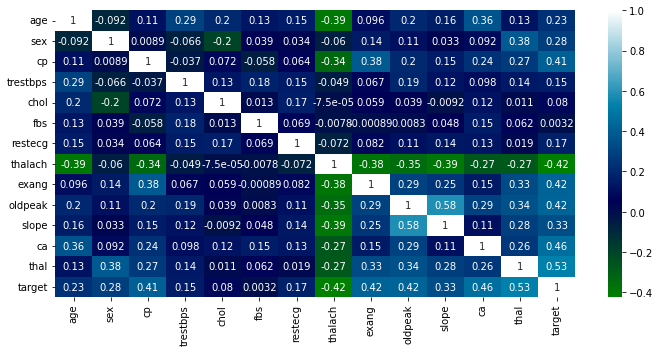

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True,cmap='ocean')
plt.tight_layout()
plt.show()

In [43]:
# Create subplots with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Create the bar plot for age distribution
age_counts = df1['age'].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=age_counts.index, y=age_counts.values, name='Age Distribution'),
    secondary_y=False,
)

# Create line plots for male and female distributions
for sex in df1['sex'].unique():
    sex_age_counts = df1[df1['sex'] == sex]['age'].value_counts().sort_index()
    fig.add_trace(
        go.Scatter(x=sex_age_counts.index, y=sex_age_counts.values, mode='lines+markers', name=f'Distribution for {sex}'),
        secondary_y=True,
    )

# Update layout
fig.update_layout(
    title_text='Age Distribution with Male and Female Distributions',
    xaxis_title='Age',
    yaxis_title='Count',
)

# Set y-axes titles
fig.update_yaxes(title_text="Total Count", secondary_y=False)
fig.update_yaxes(title_text="Count by Sex", secondary_y=True)

fig.show()


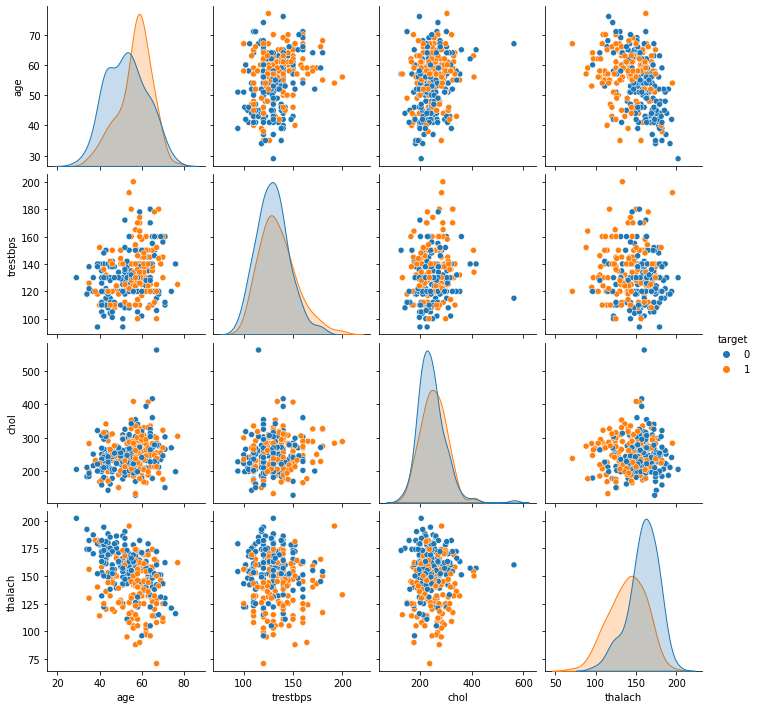

In [44]:
sns.pairplot(data=df1,vars=['age','trestbps', 'chol','thalach'],hue='target')


In [45]:


# Assuming 'df1' is your DataFrame and it contains the 'target' column

# Distribution of samples by target label
target = df1['target'].value_counts()
target_labels = ['0', '1']
colors = ['steelblue', 'tomato']

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "domain"}]])

# Horizontal bar chart
fig.add_trace(
    go.Bar(
        y=target.index.astype(str),
        x=target.values,
        orientation='h',
        marker=dict(color=colors),
        text=target.values,  # This adds the text on the bars
        textposition='outside',
    ),
    row=1, col=1
)

# Pie chart
fig.add_trace(
    go.Pie(
        labels=target_labels,
        values=target.values,
        pull=[0.05] * len(target.index),  # This creates the 'explode' effect
        textinfo='percent+label',
        marker=dict(colors=colors),
    ),
    row=1, col=2
)

# Update the layout
fig.update_layout(
    title='Distribution of Samples by heart deaseas',
    showlegend=False,
    barmode='group'
)

# Show plot
fig.show()


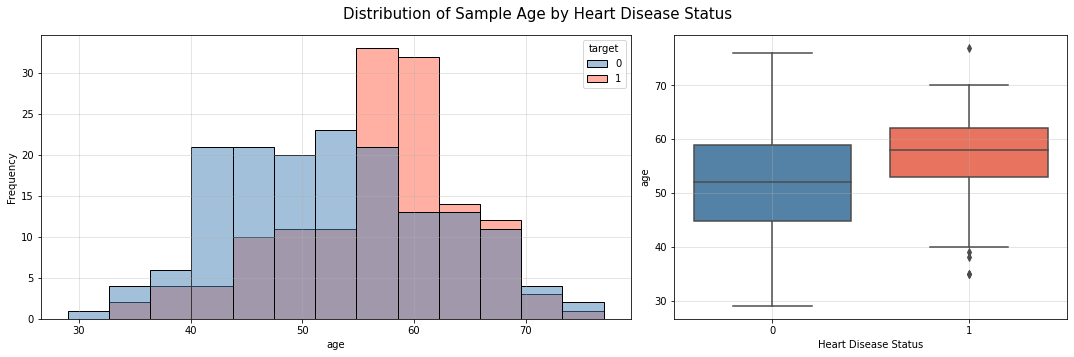

Test statistic:  -4.0048
P-value:  0.0001


In [46]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'df1' is your DataFrame and 'colors' is a list or dict of colors for the palette

# visualization (histogram and boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5,), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=df1, x=df1['age'], hue=df1['target'], palette=colors, ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=df1, x=df1['target'], y=df1['age'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Heart Disease Status')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Sample Age by Heart Disease Status', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

targets = df1.groupby('target')
min_narrowing = targets.get_group(0)
sig_narrowing = targets.get_group(1)

# perform an independent T-Test
res = ttest_ind(min_narrowing['age'], sig_narrowing['age'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('P-value: ', pvalue)



In [47]:
import plotly.graph_objects as go

# Assuming 'df1' is your DataFrame and 'colors' is defined as before
colors = ['aquamarine', 'crimson']

# Boxplot for 'trestbps' by 'target'
fig = go.Figure()

fig.add_trace(
    go.Box(
        y=df1[df1['target'] == 0]['trestbps'],
        name='0',
        marker_color=colors[0]
    )
)

fig.add_trace(
    go.Box(
        y=df1[df1['target'] == 1]['trestbps'],
        name='1',
        marker_color=colors[1]
    )
)

# Update titles and axis labels
fig.update_layout(
    title={
        'text': 'Heart Disease Status',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='Resting Blood Pressure',
    xaxis=dict(
        title='Heart Disease Status',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['0', '1']
    )
)

# Show the plot
fig.show()


# Feature engineering


In [48]:
train, test = train_test_split(df1, test_size=0.2, random_state=42)

In [49]:
# segregate the feature matrix and target vector
X_train = train.drop(columns=['target'], axis=1)
y_train = train['target']

X_test = test.drop(columns=['target'], axis=1)
y_test = test['target']

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Sample loading of x_train and x_test (you'll replace this with your actual data loading)
# x_train = pd.read_csv('path_to_train_data.csv')
# x_test = pd.read_csv('path_to_test_data.csv')

# Define a function to add features
def add_features(df):
    # Interaction Terms
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    interactions = poly.fit_transform(df[['age', 'chol', 'trestbps', 'thalach']])
    for i, col_name in enumerate(poly.get_feature_names(['age', 'chol', 'trestbps', 'thalach'])):
        if col_name not in ['age', 'chol', 'trestbps', 'thalach']:
            df[col_name] = interactions[:, i]
    
    # Polynomial Features
    df['trestbps_squared'] = df['trestbps'] ** 2
    df['chol_squared'] = df['chol'] ** 2

    # Binning/Categorization
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
    df['age_binned'] = discretizer.fit_transform(df[['age']])

    # Normalization/Standardization
    # Note: Fit the scaler only on the training data!
    scaler = StandardScaler()
    df[['trestbps', 'chol', 'thalach']] = scaler.fit_transform(df[['trestbps', 'chol', 'thalach']])

    # Missing Value Indicators
    for col in ['chol', 'trestbps', 'thalach']:
        df[col + '_missing'] = df[col].isnull().astype(int)

    return df

# Apply the feature engineering to both training and testing sets
X_train = add_features(X_train)
X_test = add_features(X_test)



###DecisionTree

In [52]:
destree = DecisionTreeClassifier()
destree = destree.fit(X_train,y_train)
y_pred= destree.predict(X_test)


In [53]:
Accuracy_destree=destree.score(X_test, y_test)
Precision_destree = precision_score(y_test, y_pred, average='binary')
Recall_destree = recall_score(y_test, y_pred, average='binary')
F1_destree = f1_score(y_test, y_pred, average='binary')
Evalute_destree=pd.DataFrame([Accuracy_destree, Precision_destree, Recall_destree,F1_destree], index=["Accuracy", "Precision", "Recall","F1"], columns=["DecisionTree"])
Evalute_destree

,DecisionTree
Accuracy,0.750000
Precision,0.645161
Recall,0.833333
F1,0.727273


<Axes: >

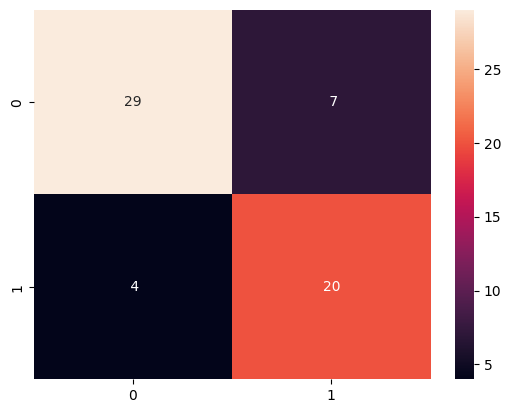

In [ ]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')

### Logistic Regression

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#prediction
y_pred=logreg.predict(X_test)



In [35]:
# Assuming y_test is your true labels and y_pred is the predictions from the logistic regression
Accuracy_lg=logreg.score(X_test, y_test)
Precision_lg = precision_score(y_test, y_pred, average='binary')
Recall_lg = recall_score(y_test, y_pred, average='binary')
F1_lg = f1_score(y_test, y_pred, average='binary')
Evalute_model_logistic=pd.DataFrame([Accuracy_lg, Precision_lg, Recall_lg,F1_lg], index=["Accuracy", "Precision", "Recall","F1"], columns=["LogisticRegression"])
Evalute_model_logistic

,LogisticRegression
Accuracy,0.683333
Precision,0.631579
Recall,0.500000
F1,0.558140


<Axes: >

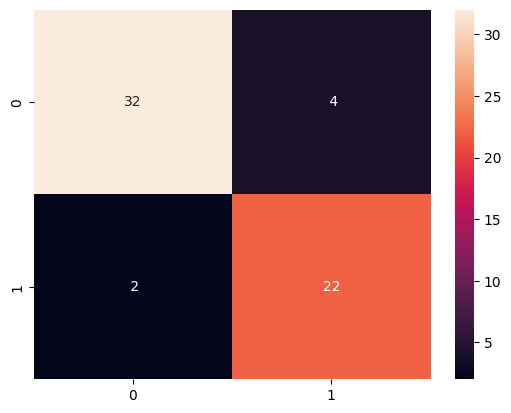

In [ ]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')

### XG_BOOST

In [ ]:
Model_Xgboost = xgboost.XGBClassifier()
Model_Xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = Model_Xgboost.predict(X_test)


In [ ]:
accuracy_xg=Model_Xgboost.score(X_test, y_test)
print(accuracy_xg)

0.8333333333333334


In [ ]:
Accuracy_xg=Model_Xgboost.score(X_test, y_test)
Precision_xg = precision_score(y_test, y_pred, average='binary')
Recall_xg = recall_score(y_test, y_pred, average='binary')
F1_xg = f1_score(y_test, y_pred, average='binary')
Evalute_model_logistic=pd.DataFrame([Accuracy_xg, Precision_xg, Recall_xg,F1_xg], index=["Accuracy", "Precision", "Recall","F1"], columns=["XGboost"])
Evalute_model_logistic

,XGboost
Accuracy,0.833333
Precision,0.750000
Recall,0.875000
F1,0.807692


<Axes: >

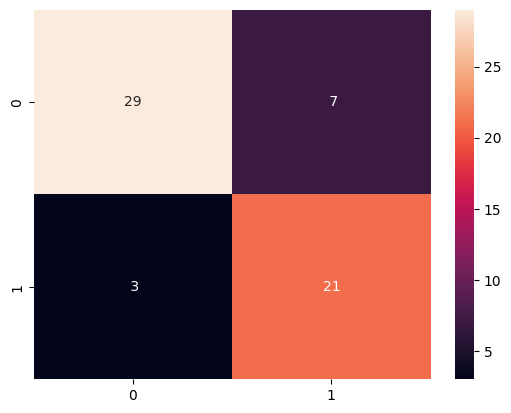

In [ ]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')

### RandomForest

In [ ]:
forest = RandomForestClassifier(random_state=42)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=forest.predict(X_test)

In [ ]:
# Assuming y_test is your true labels and y_pred is the predictions from the logistic regression
Accuracy_ft=forest.score(X_test, y_test)
Precision_ft = precision_score(y_test, y_pred, average='binary')
Recall_ft = recall_score(y_test, y_pred, average='binary')
F1_ft= f1_score(y_test, y_pred, average='binary')
Evalute_model_logistic=pd.DataFrame([Accuracy_ft, Precision_ft, Recall_ft,F1_ft], index=["Accuracy", "Precision", "Recall","F1"], columns=["RandomForest"])
Evalute_model_logistic

,RandomForest
Accuracy,0.883333
Precision,0.840000
Recall,0.875000
F1,0.857143


<Axes: >

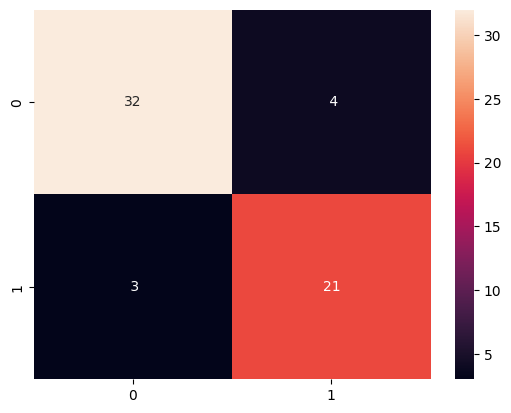

In [ ]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')

### Evaluate Models

In [ ]:
Evalute_all_model = pd.DataFrame({
    "DecisionTree": [Accuracy_destree, Precision_destree, Recall_destree, F1_destree],
    "RandomForest":[Accuracy_ft, Precision_ft, Recall_ft, F1_ft],
    "LogisticRegression": [Accuracy_lg, Precision_lg, Recall_lg, F1_lg],
    "XGBoost": [Accuracy_xg, Precision_xg, Recall_xg, F1_xg],
}, index=["Accuracy", "Precision", "Recall", "F1"])
Evalute_all_model

,DecisionTree,RandomForest,LogisticRegression,XGBoost
Accuracy,0.783333,0.883333,0.900000,0.833333
Precision,0.703704,0.840000,0.846154,0.750000
Recall,0.791667,0.875000,0.916667,0.875000
F1,0.745098,0.857143,0.880000,0.807692


### Hypertuning

#### Decision Tree

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}





In [ ]:
# create the GridSearchCV object
grid_search_DT = GridSearchCV(destree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# fit the grid search to the data
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid_search_DT.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       splitter='random')

In [ ]:
Accuracy_Dt=grid_search_DT.score(X_test, y_test)
Precision_Dt= precision_score(y_test, y_pred, average='binary')
Recall_Dt = recall_score(y_test, y_pred, average='binary')
F1_Dt = f1_score(y_test, y_pred, average='binary')
Evalute_Dt=pd.DataFrame([Accuracy_Dt, Precision_Dt, Recall_Dt,F1_Dt], index=["Accuracy", "Precision", "Recall","F1"], columns=["DecisionTree"])
Evalute_Dt

,DecisionTree
Accuracy,0.816667
Precision,0.846154
Recall,0.916667
F1,0.880000


<Axes: >

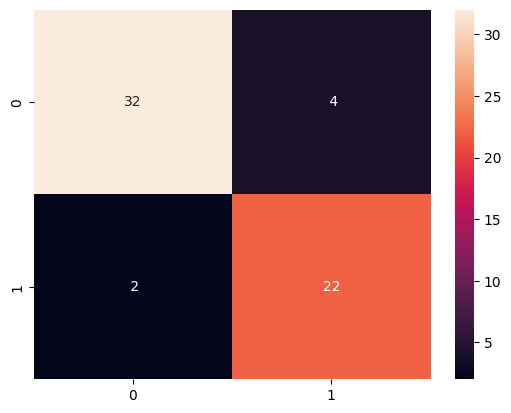

In [ ]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')

#### Random Forest

In [ ]:
# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}


In [ ]:
# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy:  0.81427304964539


### Save model